In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
plt.style.use("ggplot")

In [2]:
iris = datasets.load_iris()

1.

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2.

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['type'] = iris.target
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   type  
0     0  
1     0  
2     0  
3     0  
4     0  


3.

In [5]:
columns_name = [ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name = [col.replace("(" ,"_") for col in columns_name ]
cols = [col.replace(")" ,"") for col in columns_name ]

df.columns = cols
print(df.head())

   SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  Type
0             5.1            3.5             1.4            0.2     0
1             4.9            3.0             1.4            0.2     0
2             4.7            3.2             1.3            0.2     0
3             4.6            3.1             1.5            0.2     0
4             5.0            3.6             1.4            0.2     0


4.

In [6]:
print(df.describe())
print("---")
print(df.isnull().sum())

       SepalLength_cm  SepalWidth_cm  PetalLength_cm  PetalWidth_cm  \
count      150.000000     150.000000      150.000000     150.000000   
mean         5.843333       3.057333        3.758000       1.199333   
std          0.828066       0.435866        1.765298       0.762238   
min          4.300000       2.000000        1.000000       0.100000   
25%          5.100000       2.800000        1.600000       0.300000   
50%          5.800000       3.000000        4.350000       1.300000   
75%          6.400000       3.300000        5.100000       1.800000   
max          7.900000       4.400000        6.900000       2.500000   

             Type  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  
---
SepalLength_cm    0
SepalWidth_cm     0
PetalLength_cm    0
PetalWidth_cm     0
Type              0
dtype: int64


5.

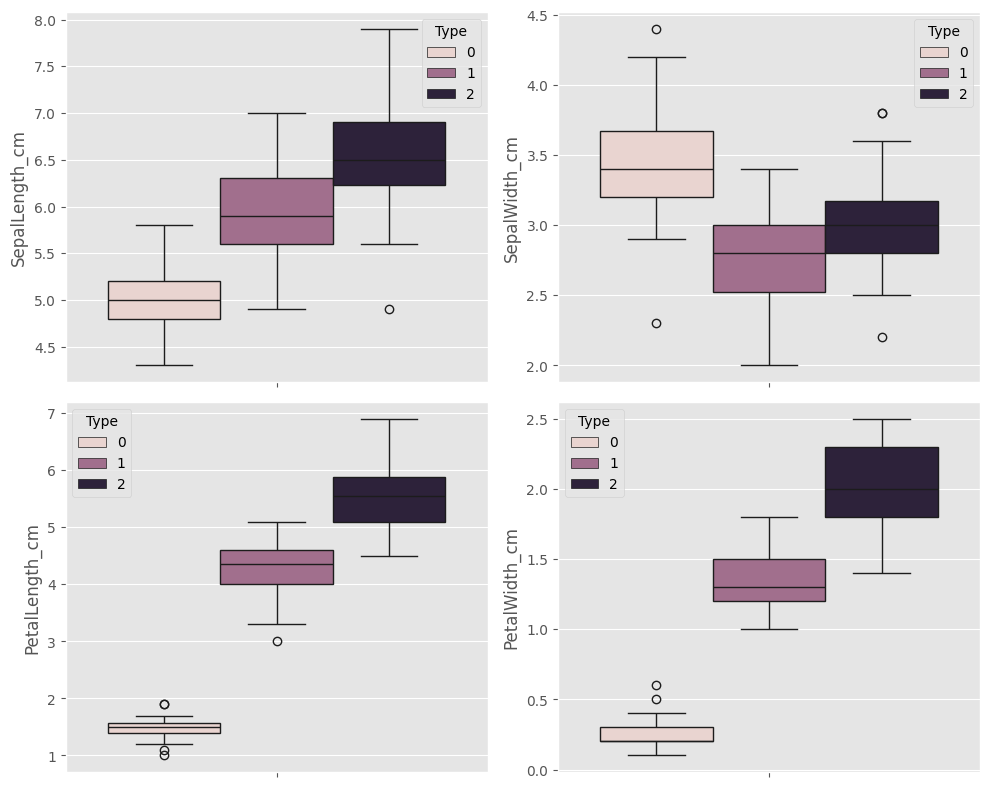

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1 = sns.boxplot(data=df,y="SepalLength_cm",hue="Type",ax=axes[0,0])
ax2 = sns.boxplot(data=df,y="SepalWidth_cm",hue="Type",ax=axes[0,1])
ax3 = sns.boxplot(data=df,y="PetalLength_cm",hue="Type",ax=axes[1,0])
ax4 = sns.boxplot(data=df,y="PetalWidth_cm",hue="Type",ax=axes[1,1])
plt.tight_layout()
plt.show()

6.

<Axes: >

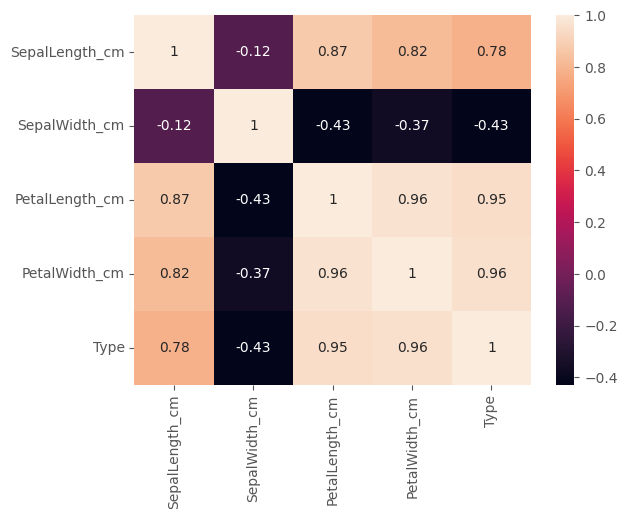

In [8]:
matrix = df.corr()
sns.heatmap(matrix,annot=True)

7.

In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["Type"]):
  df_train = df.loc[train_index]
  df_test = df.loc[test_index]

print(len(df_train))
print(len(df_test))

120
30


120 de los datos se usaran para el training, 30 de los datos se usaran para el test.

8.

In [10]:
df_train2 = df_train.copy()

for i in df_train2.index:
  if df_train2.loc[i,"Type"] == 0:
    df_train2.loc[i,"Type"] = "Setosa"
  elif df_train2.loc[i,"Type"] == 1 or df_train2.loc[i,"Type"] == 2:
    df_train2.loc[i,"Type"] = "No Setosa"

Tipo = df_train2.iloc[:,0].values.reshape(-1,1) #Se esocgió evaluar solamente la
#característica SepalLength
LR = LogisticRegression()
LR.fit(Tipo, df_train2["Type"])


/tmp/ipython-input-4128689902.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train2.loc[i,"Type"] = "Setosa"


LogisticRegression()

9.

In [11]:
X_new = np.linspace(4,8,1000).reshape(-1, 1)
prob = LR.predict_proba(X_new)

decision_boundary = X_new[prob[:,0] >= 0.5][0]
print(decision_boundary)

[5.35335335]


10.

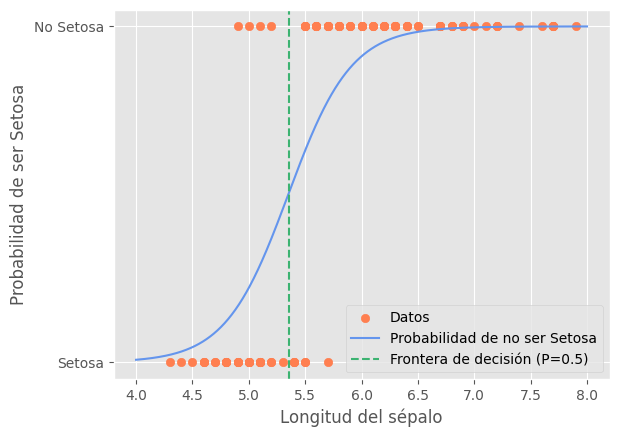

In [12]:
plt.scatter(df_train2["SepalLength_cm"], df_train2["Type"], color="coral", label="Datos")
plt.plot(X_new, prob[:,0], color="cornflowerblue", label="Probabilidad de no ser Setosa")
plt.axvline(x=decision_boundary, color="mediumseagreen", linestyle="--", label="Frontera de decisión (P=0.5)")
plt.xlabel("Longitud del sépalo")
plt.ylabel("Probabilidad de ser Setosa")
plt.legend()
plt.show()

11.

In [13]:
df_train3 = df_train.copy()

for i in df_train3.index:
  if df_train3.loc[i,"Type"] == 0:
    df_train3.loc[i,"Type"] = "Setosa"
  if df_train3.loc[i,"Type"] == 1:
    df_train3.loc[i,"Type"] = "Versicolor"
  if df_train3.loc[i,"Type"] == 2:
    df_train3.loc[i,"Type"] = "Virginica"

LR = LogisticRegression()
LR.fit(df_train3.drop(["Type"],axis=1), df_train3["Type"])

/tmp/ipython-input-1372097455.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Setosa' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train3.loc[i,"Type"] = "Setosa"


LogisticRegression()

12.

In [14]:
X = [4.9,5.0,1.8,0.3]
print(LR.predict_proba([X]))
print(LR.predict([X]))
print(LR.classes_)

[[9.92148526e-01 7.85141188e-03 6.17254602e-08]]
['Setosa']
['Setosa' 'Versicolor' 'Virginica']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


La probabilidad para que los datos dados pertenezcan a los tres tipos son 99.2%, 0.785% y 6.17e-6% para Setosa, Versicolor y Virgninica respectivamente